In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [2]:
file_path = 'Mendelian.train.tsv'
df=pd.read_csv(file_path, sep='\t')

In [3]:
metrics = df.columns.tolist()

In [4]:
POSITIVES_NUMBER = 356

In [5]:
from scipy.stats import norm, beta, gamma, expon, exponweib
distributions = {
    "CpGobsExp": beta,
    "CpGperCpG": beta,
    "CpGperGC": norm,
    "DGVCount": gamma,
    "DnaseClusteredHyp": gamma,
    "EncH3K27Ac": gamma,
    "GCContent": norm,
    "EncH3K4Me3": gamma,
    "ISCApath": gamma,
    "DnaseClusteredScore": beta,
    "EncH3K4Me1": gamma,
    "GerpRS": gamma,
    "GerpRSpv": gamma,
    "commonVar": exponweib,
    "dbVARCount": gamma,
    "fantom5Perm": gamma,
    "fantom5Robust": gamma,
    "mamPhastCons46way": gamma,
    "priPhastCons46way": gamma,
    "rareVar": beta,
    "verPhastCons46way": gamma,
    "numTFBSConserved": expon,
    "fracRareCommon": beta,
    "priPhyloP46way": beta,
    "verPhyloP46way": norm,
    "mamPhyloP46way": norm
}

In [6]:
def get_frequencies(my_list):
    n = len(my_list)
    unique, counts = np.unique(my_list, return_counts=True)
    counts = counts.astype(float)/n
    return dict(zip(unique, counts)) 

In [7]:
def plot_frequencies(name, my_list):
    """Plot given list by frequencies and list values."""
    plt.title(name)
    arr = np.array(my_list)
    trimmed = arr[arr != 0]
    mean = np.mean(trimmed)
    min_val, max_val = np.min(trimmed), np.max(trimmed)
    normal_arr = (trimmed - mean) / (max_val - min_val)
    frequencies = get_frequencies(normal_arr)
    try:
        y = [frequencies[i] for i in normal_arr]
    except Exception:
        return
    plt.xlabel(name)
    plt.ylabel("frequency")
    plt.plot(normal_arr, y, '.', markersize=2)

In [10]:
def plot_estimated_distribution(name, metric, my_list):
    """Plot given list by frequencies and list values."""
    arr = np.array(my_list)
    trimmed = arr[arr != 0]
    mean = np.mean(trimmed)
    min_val, max_val = np.min(trimmed), np.max(trimmed)
    normal_arr = (trimmed - mean) / (max_val - min_val)
    distribution = distributions[metric]
    parameters = distribution.fit(normal_arr)
    print("Distribution parameters: %s"%str(parameters))
    x = np.sort(distribution.rvs(*parameters, size=1000))
    y = distribution.pdf(x, *parameters)
    
    plt.title("Estimating %s density with %s"%(metric, distribution.name))
    plt.xlabel(name)
    plt.ylabel("density")
    plt.plot(x, y, '.', markersize=2)

HBox(children=(IntProgress(value=0, max=26), HTML(value='')))

/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Distribution parameters: (7.666447511347299, 1833202.033057789, -0.3464900046823688, 82853.03134254903)


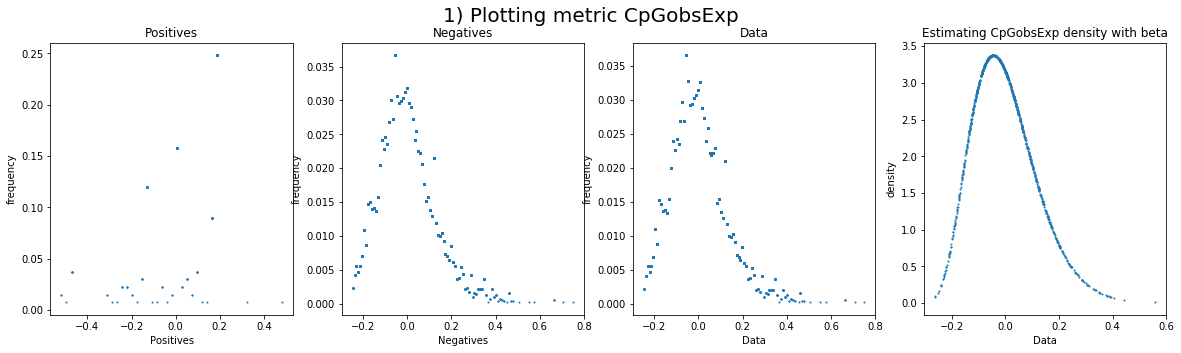

Distribution parameters: (6.402173000059713, 248888092.5310192, -0.2859194853829513, 11115281.754926981)


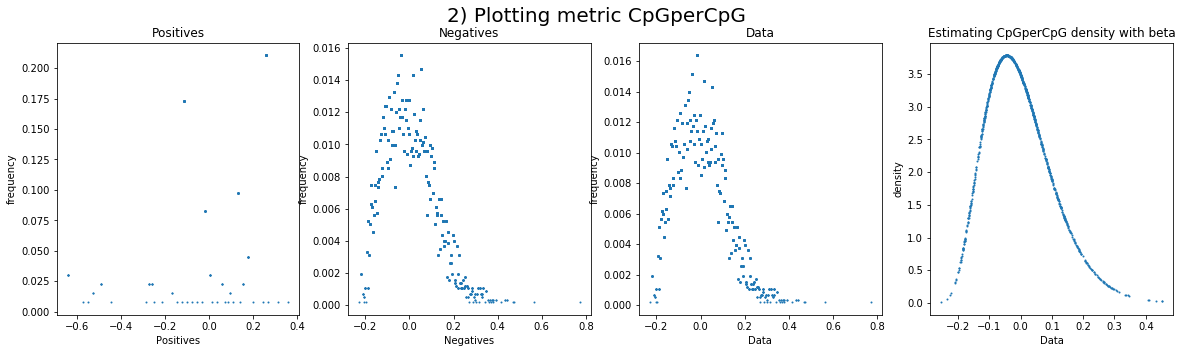

Distribution parameters: (2.5557292353254753e-16, 0.15949294643574352)


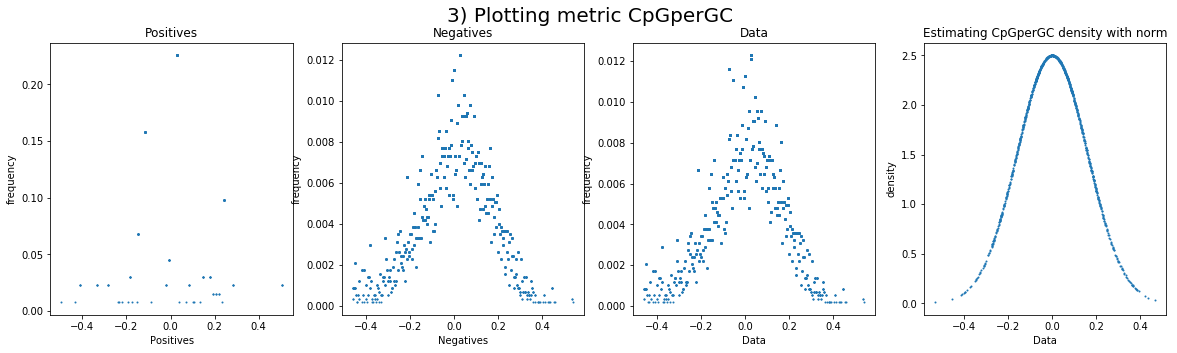

Distribution parameters: (0.2070317612917308, -0.02674871916678672, 1.1708119225412017)


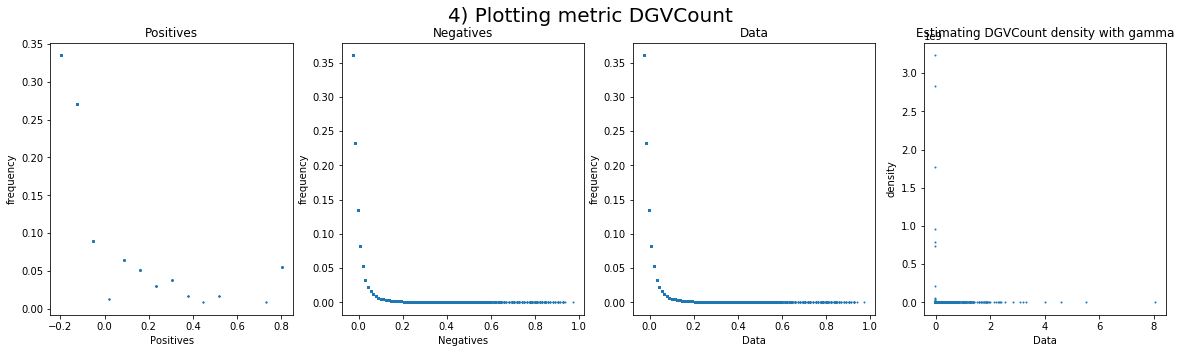

Distribution parameters: (0.11860955177980875, -0.12917662107588523, 0.42441950930054667)


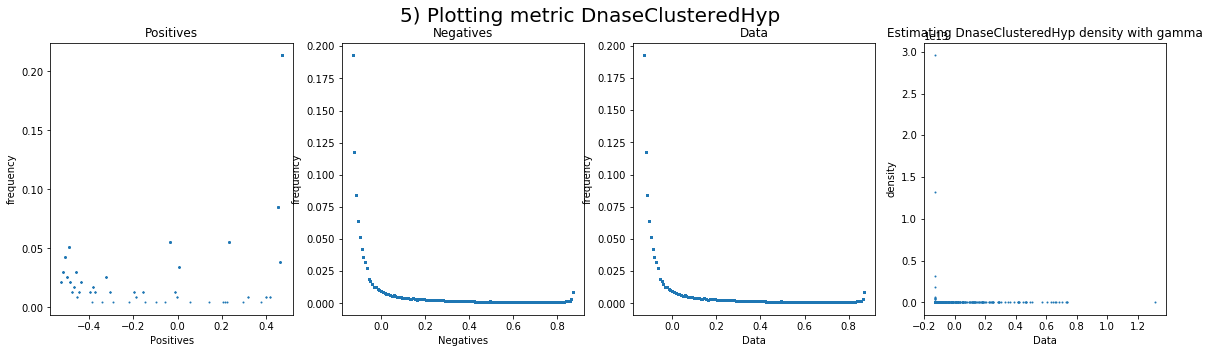

Distribution parameters: (0.26998472600770035, 0.6942565020932233, -0.34155552567941905, 1.0046713484066403)


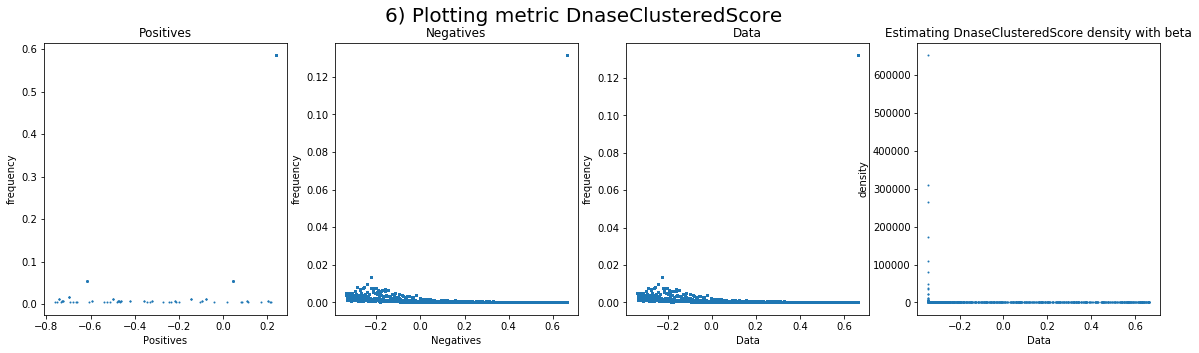

Distribution parameters: (0.0004252421868269318, -0.0004205443708391254, 0.027817036881218976)


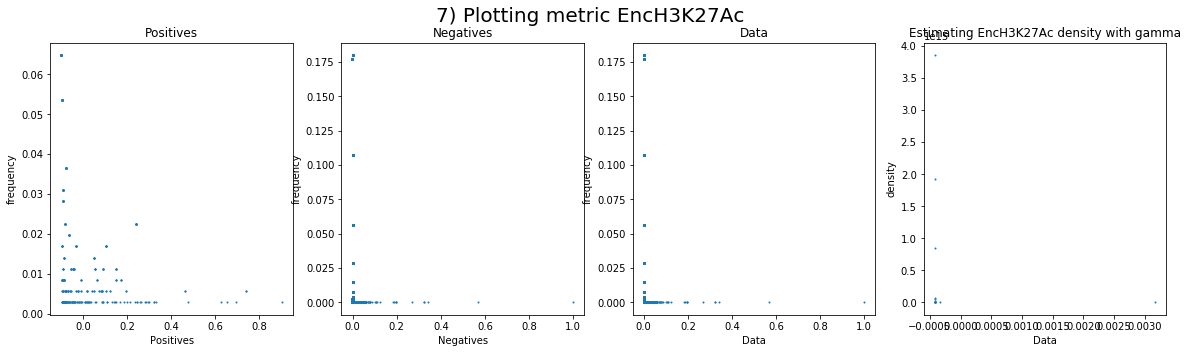

Distribution parameters: (0.23299511324372263, -0.01347151681728698, 1.2677076153470344)


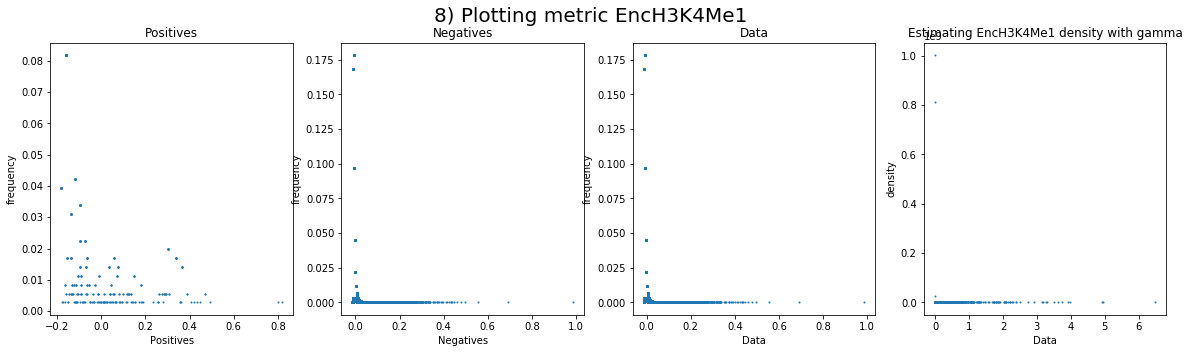

Distribution parameters: (0.009879201792846851, -0.0011134268314023474, 0.03629234889848502)


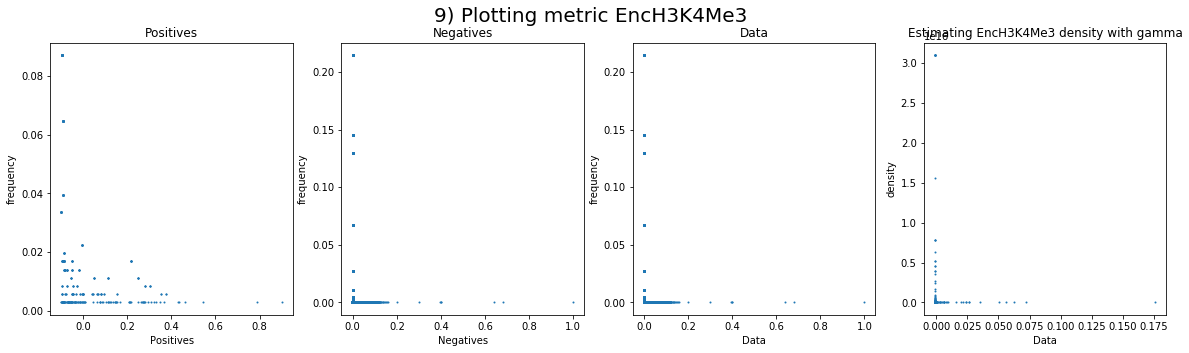

Distribution parameters: (-1.2720521818185325e-16, 0.10974248693600112)


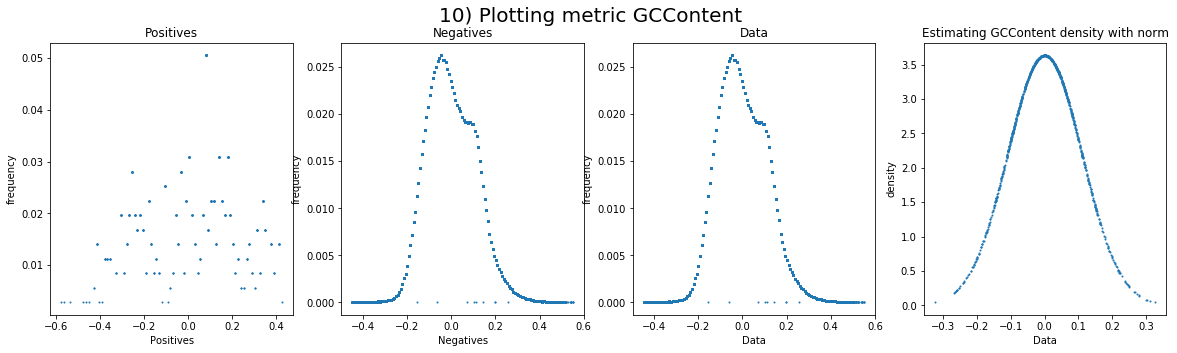

Distribution parameters: (0.7903243571329597, -0.09995931167031427, 0.14054816100177098)


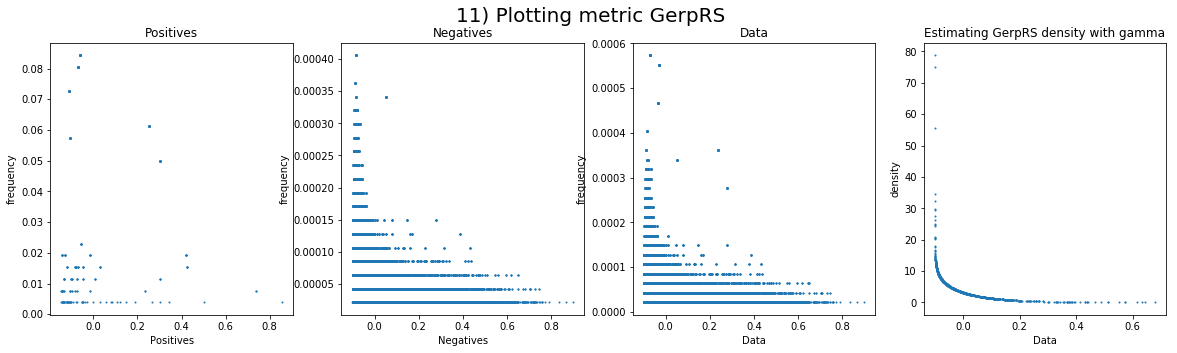

Distribution parameters: (0.4016063948726667, -0.04640918883619188, 0.22880976588213986)


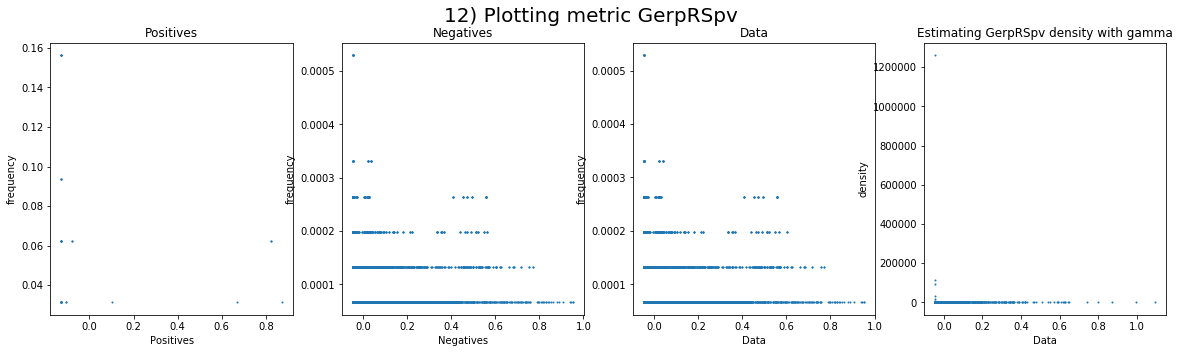

Distribution parameters: (0.08098789215501834, -0.011182945138372608, 1.1874261075975356)


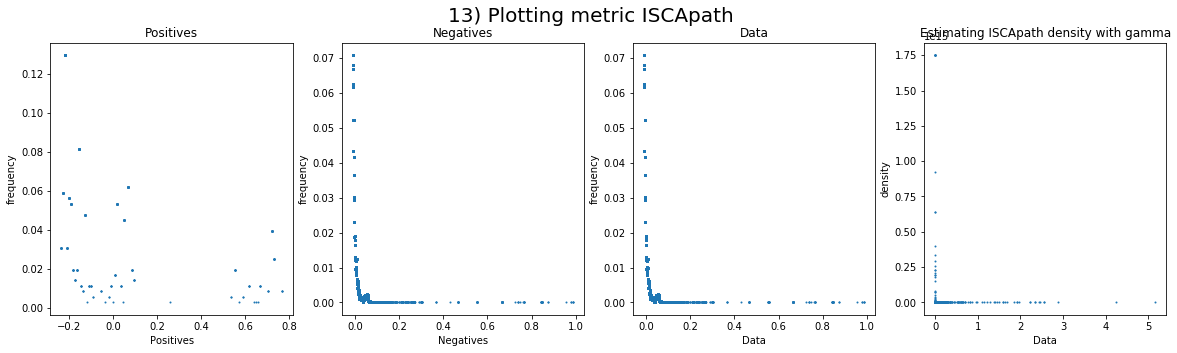

Distribution parameters: (5.084744073926816, 1.0150017146843415, -0.05657648787394846, 0.024984214943184604)


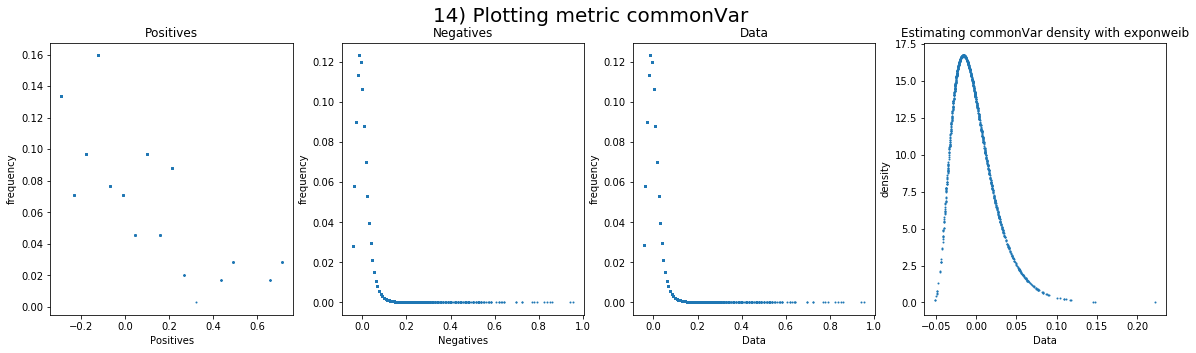

Distribution parameters: (0.2070317612917308, -0.02674871916678672, 1.1708119225412017)


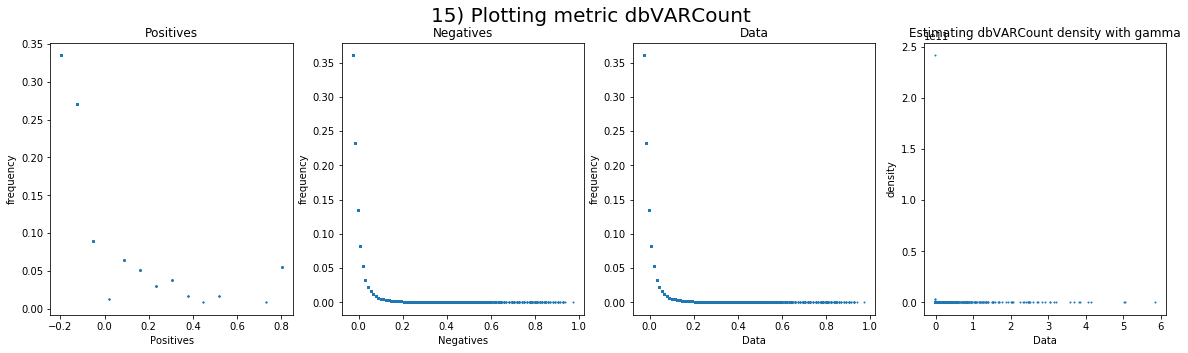

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Distribution parameters: (0.06595501687831701, -0.01369958187364924, 1.1874416791139142)


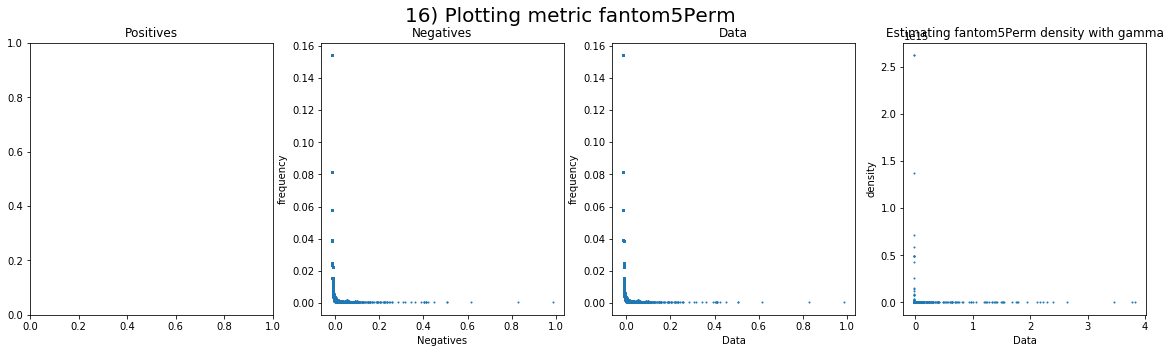

Distribution parameters: (0.09105620561961975, -0.01732170643819321, 1.1714458491553867)


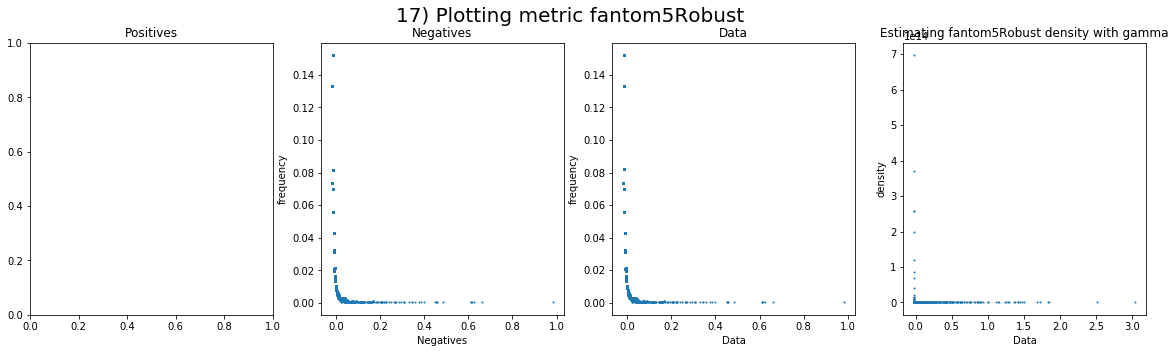

Distribution parameters: (1656.9507624352982, 15.06524153466846, -42.20436648705335, 42.58816996395423)


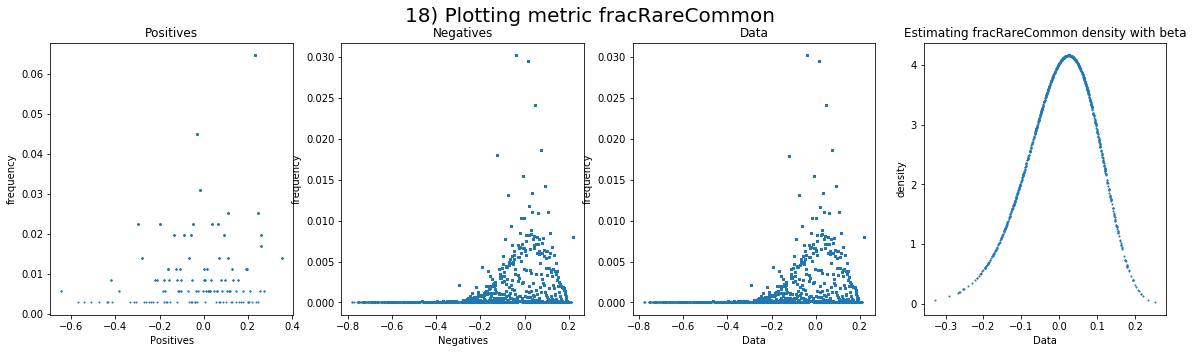

Distribution parameters: (0.27014188191173016, -0.06036908103156126, 0.3568417570361197)


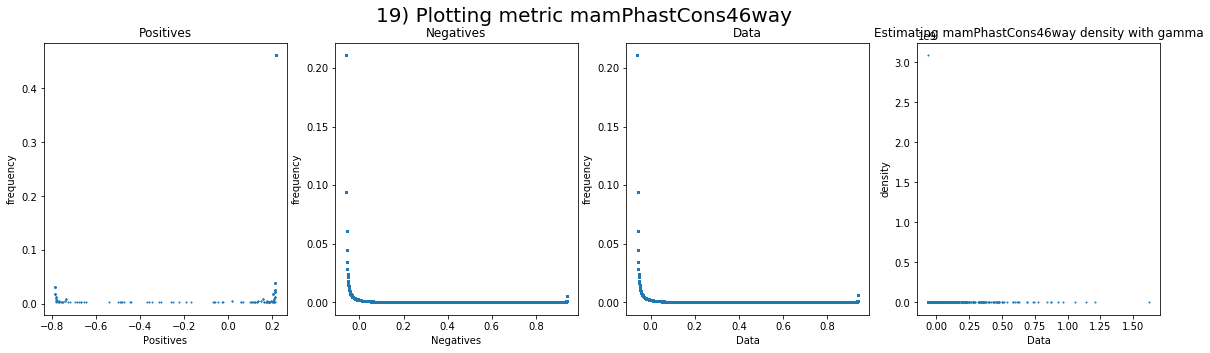

Distribution parameters: (-9.418689880777725e-18, 0.07627203289198752)


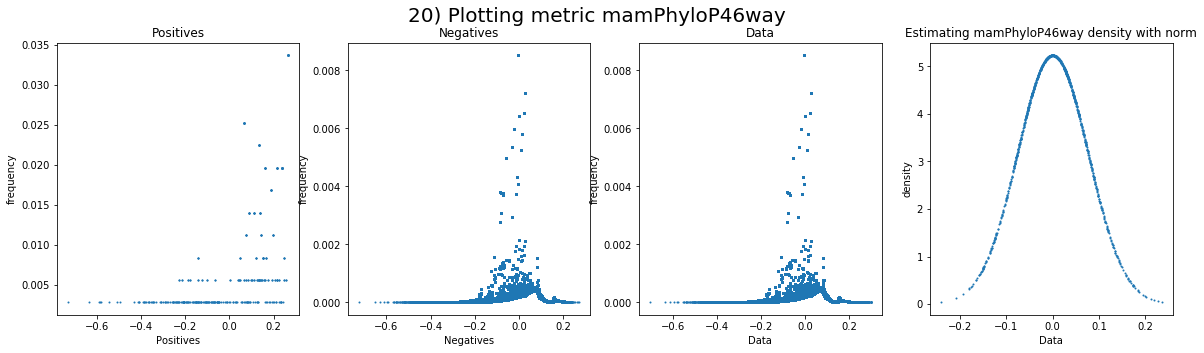

Distribution parameters: (-0.03342274685522843, 0.03341974673594997)


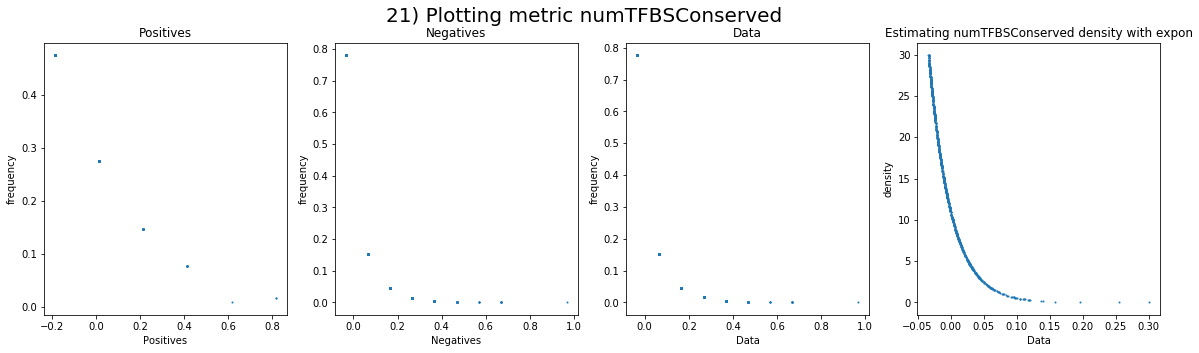

Distribution parameters: (0.12104175208230192, -0.052267250846815105, 0.4078649544635624)


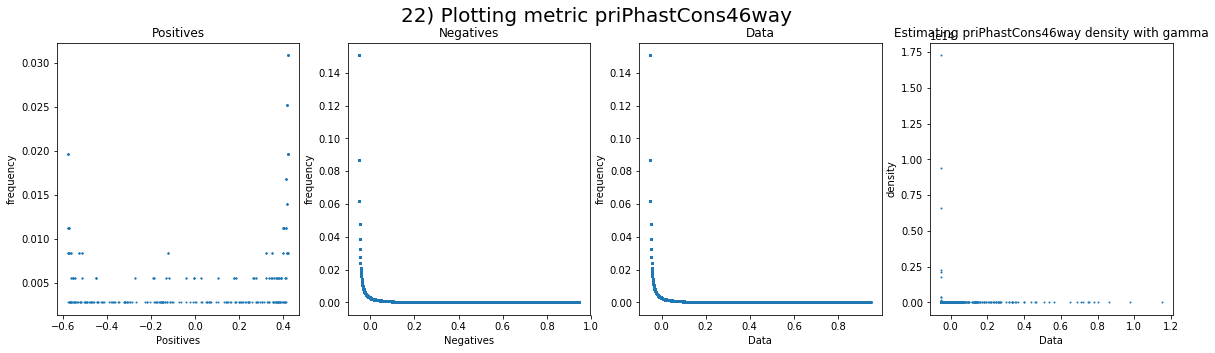

Distribution parameters: (169878990.4857019, 4.212909930453263, -8351770.585285159, 8351770.791670676)


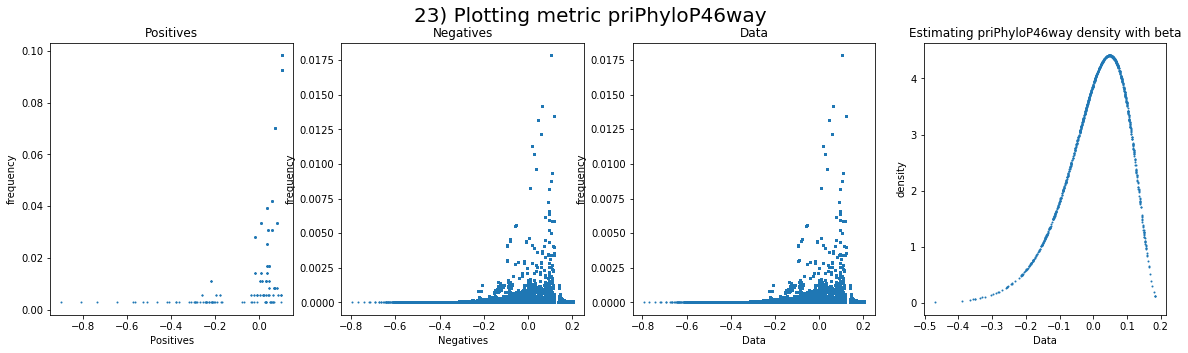

Distribution parameters: (15.625174478965683, 12368572.470268596, -0.05554100082622341, 43967.82983807648)


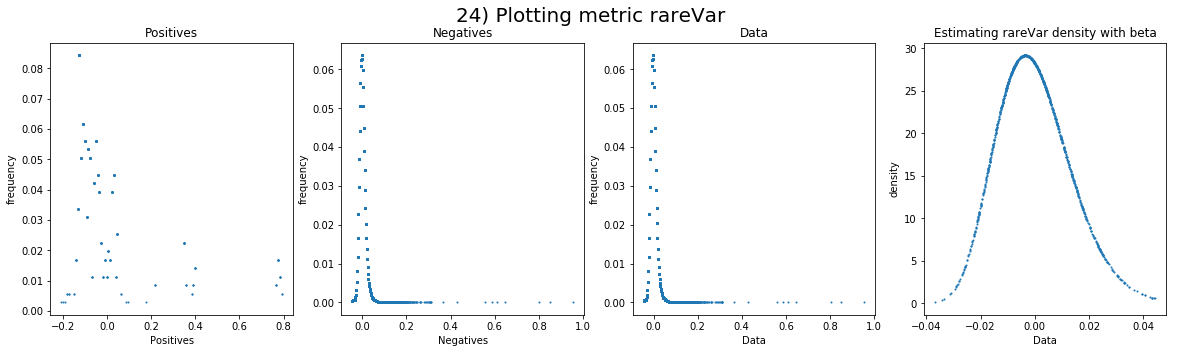

Distribution parameters: (0.33596623380514445, -0.07460671889290628, 0.38750586608073834)


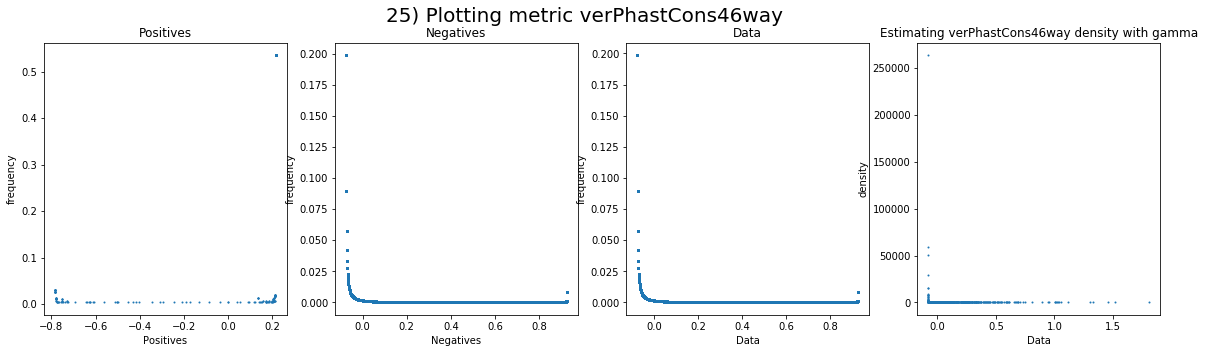

Distribution parameters: (3.9982426228060234e-19, 0.06627159471391848)


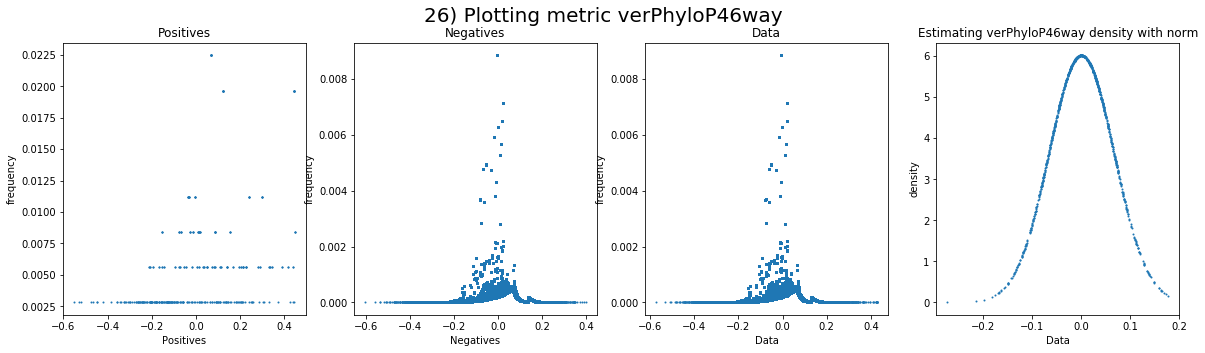

In [11]:
from collections import Counter

for i, metric in tqdm(enumerate(metrics), total=len(metrics)):
    data = list(df[metric])
    positives, negatives = data[:POSITIVES_NUMBER], data[POSITIVES_NUMBER:]
    plt.rcParams['figure.figsize'] = [20, 5]
    plt.suptitle("%s) Plotting metric %s"%(i+1, metric), fontsize=20)
    plt.subplot(141)
    plot_frequencies("Positives", positives)
    plt.subplot(142)
    plot_frequencies("Negatives", negatives)
    plt.subplot(143)
    plot_frequencies("Data", data)
    plt.subplot(144)
    plot_estimated_distribution("Data", metric, data)
    plt.savefig("stats/%s"%metric)
    plt.show()
